### Imports

In [1]:
from agents.fact_checker_agent import FactCheckerAgent
from network.socialnetwork import SocialNetworkEnv
from agents.news_agent import NewsAgent
import numpy as np

### Setup

In [ ]:
network = SocialNetworkEnv(numConsumer=4)

# created a fake and real info agent and add a few consumers to the network
fAgent = NewsAgent("fake-information", state_space_size=2, env=network, trustLevel=0)
rAgent = NewsAgent("real-information", state_space_size=2, env=network, trustLevel=0)
fcAgent = FactCheckerAgent("fact-checker", trustLevel=0.0, env=network)

network.add_news_agents_to_network(agentType=fAgent)
network.add_news_agents_to_network(agentType=rAgent)
network.add_fact_checker_to_network(agentType=fcAgent)

fAgent_action = network.draw_sample_from_action_space()
rAgent_action = network.draw_sample_from_action_space()
fcAgent_action = network.draw_sample_from_action_space()

print('fagent action', fAgent_action)
print('ragent action', rAgent_action)
# network.render()

# print("---------------- Initial Graph ---------------")
network.print_graph()

fagent action [0 1 0 1]
ragent action [1 1 0 1]
Node 0: Points to -> 1
Node 1: Points to -> 2
Node 2: Points to -> 1, 3
Node 3: Points to -> 0
Node 4: Points to -> 0, 1, 2, 3
Node 5: Points to -> 0, 1, 2, 3
Node 6: Points to -> 0


### Training

--------- epoch 0 ---------------------
total_consumer_nodes in nw 4
original nw influence of src agent 4 : 0.00
agent 4
num of influenced consumer from agent  4 4
all consumers 4  influenced [1, 3, 2, 0]
total trust_in src agent 1.0


total_consumer_nodes in nw 4
original nw influence of src agent 5 : 0.00
agent 5
num of influenced consumer from agent  5 4
all consumers 5  influenced [0, 1, 3, 2]
total trust_in src agent 1.0


Fact-checker Q-value updated: 0.00
Graph Nodes and Attributes:
Node 0: {'agentType': 'consumer', 'trustLevel': 0.1, 'storedInfo': [(4, '1.00'), (5, '0.25')], 'reward': 0, 'penalty': 0}
Node 1: {'agentType': 'consumer', 'trustLevel': 0, 'storedInfo': [(4, '0.25'), (5, '0.50')], 'reward': 0, 'penalty': 0}
Node 2: {'agentType': 'consumer', 'trustLevel': 0, 'storedInfo': [(4, '0.75'), (5, '1.00')], 'reward': 0, 'penalty': 0}
Node 3: {'agentType': 'consumer', 'trustLevel': 0.1, 'storedInfo': [(4, '0.50'), (5, '0.75')], 'reward': 0, 'penalty': 0}
Node 4: {'agentType':

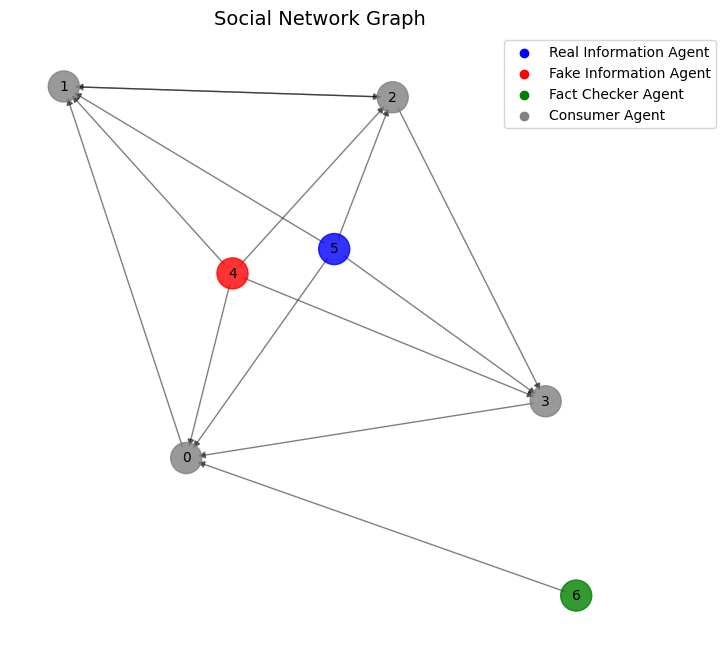

fake info - reward: 1, penalty : 3
real info - reward: 2, penalty : 2
fact checker - reward: 0 penalty: 0
--------- epoch 1 ---------------------
total_consumer_nodes in nw 4
original nw influence of src agent 4 : 1.00
agent 4
num of influenced consumer from agent  4 4
all consumers 4  influenced [1, 3, 2, 0]
total trust_in src agent 1.0


total_consumer_nodes in nw 4
original nw influence of src agent 5 : 1.00
agent 5
num of influenced consumer from agent  5 4
all consumers 5  influenced [0, 1, 3, 2]
total trust_in src agent 1.0


Fact-checker Q-value updated: 0.00
Graph Nodes and Attributes:
Node 0: {'agentType': 'consumer', 'trustLevel': 0, 'storedInfo': [(4, '1.00'), (5, '0.25'), (4, '1.00'), (5, '1.00')], 'reward': 0, 'penalty': 0}
Node 1: {'agentType': 'consumer', 'trustLevel': 0.1, 'storedInfo': [(4, '0.25'), (5, '0.50'), (4, '1.00'), (5, '1.00')], 'reward': 0, 'penalty': 0}
Node 2: {'agentType': 'consumer', 'trustLevel': 0, 'storedInfo': [(4, '0.75'), (5, '1.00'), (4, '1.00'), 

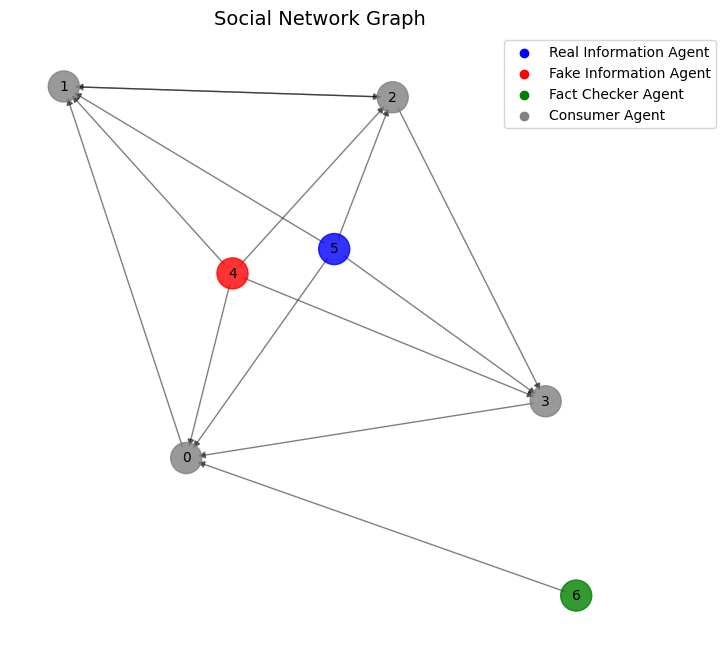

fake info - reward: 2, penalty : 6
real info - reward: 3, penalty : 5
fact checker - reward: 0 penalty: 0
--------- epoch 2 ---------------------
total_consumer_nodes in nw 4
original nw influence of src agent 4 : 1.00
agent 4
num of influenced consumer from agent  4 4
all consumers 4  influenced [1, 3, 2, 0]
total trust_in src agent 1.0


total_consumer_nodes in nw 4
original nw influence of src agent 5 : 1.00
agent 5
num of influenced consumer from agent  5 4
all consumers 5  influenced [0, 1, 3, 2]
total trust_in src agent 1.0


Fact-checker penalized fake news agent 4.
Fact-checker Q-value updated: 0.19
Graph Nodes and Attributes:
Node 0: {'agentType': 'consumer', 'trustLevel': 0, 'storedInfo': [(4, '1.00'), (5, '0.25'), (4, '1.00'), (5, '1.00'), (4, '1.00'), (5, '1.00')], 'reward': 0, 'penalty': 0}
Node 1: {'agentType': 'consumer', 'trustLevel': 0, 'storedInfo': [(4, '0.25'), (5, '0.50'), (4, '1.00'), (5, '1.00'), (4, '1.00'), (5, '1.00')], 'reward': 0, 'penalty': 0}
Node 2: {'age

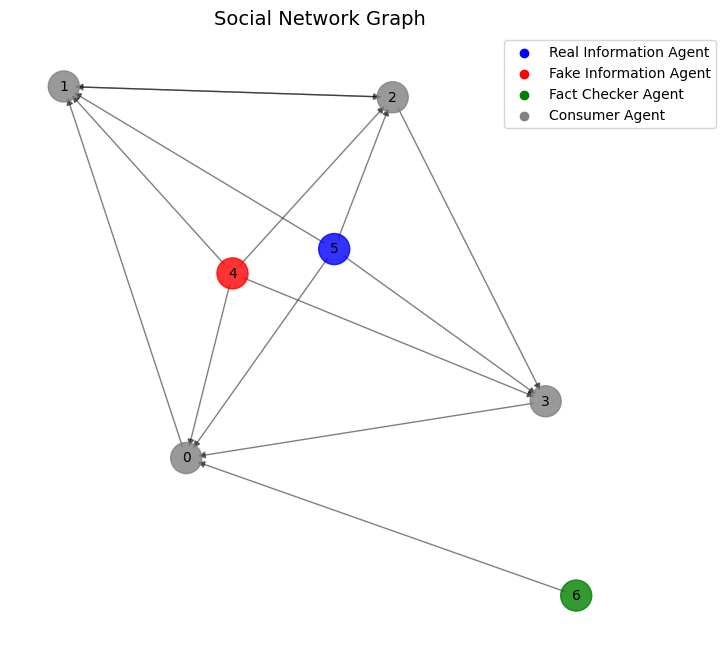

fake info - reward: 2, penalty : 10
real info - reward: 5, penalty : 7
fact checker - reward: 1 penalty: 0
--------- epoch 3 ---------------------
total_consumer_nodes in nw 4
original nw influence of src agent 4 : 1.00
agent 4
num of influenced consumer from agent  4 4
all consumers 4  influenced [1, 3, 2, 0]
total trust_in src agent 1.0


total_consumer_nodes in nw 4
original nw influence of src agent 5 : 1.00
agent 5
num of influenced consumer from agent  5 4
all consumers 5  influenced [0, 1, 3, 2]
total trust_in src agent 1.0


Fact-checker penalized fake news agent 4.
Fact-checker Q-value updated: 0.55
Graph Nodes and Attributes:
Node 0: {'agentType': 'consumer', 'trustLevel': 0.2, 'storedInfo': [(4, '1.00'), (5, '0.25'), (4, '1.00'), (5, '1.00'), (4, '1.00'), (5, '1.00'), (4, '1.00'), (5, '1.00')], 'reward': 0, 'penalty': 0}
Node 1: {'agentType': 'consumer', 'trustLevel': 0, 'storedInfo': [(4, '0.25'), (5, '0.50'), (4, '1.00'), (5, '1.00'), (4, '1.00'), (5, '1.00'), (4, '1.00'),

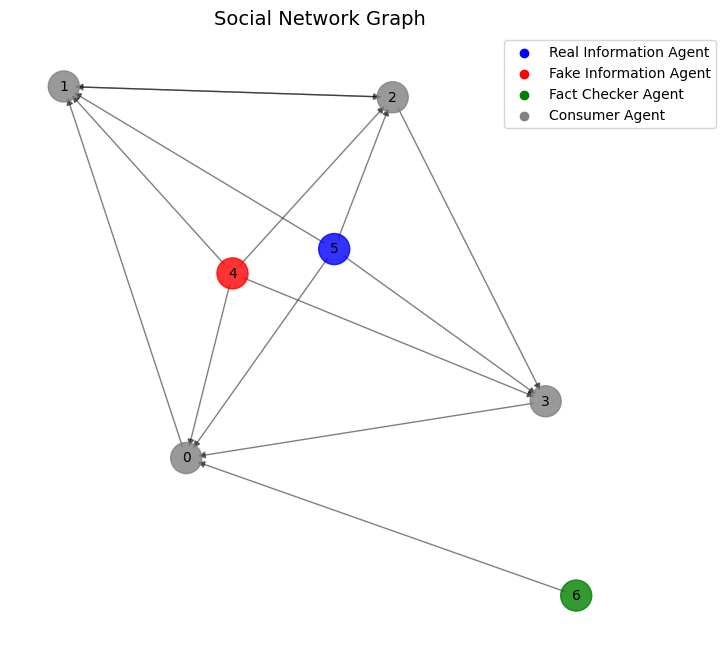

fake info - reward: 4, penalty : 12
real info - reward: 7, penalty : 9
fact checker - reward: 2 penalty: 0
--------- epoch 4 ---------------------
total_consumer_nodes in nw 4
original nw influence of src agent 4 : 1.00
agent 4
num of influenced consumer from agent  4 4
all consumers 4  influenced [1, 3, 2, 0]
total trust_in src agent 1.0


total_consumer_nodes in nw 4
original nw influence of src agent 5 : 1.00
agent 5
num of influenced consumer from agent  5 4
all consumers 5  influenced [0, 1, 3, 2]
total trust_in src agent 1.0


Fact-checker penalized fake news agent 4.
Fact-checker Q-value updated: 1.07
Graph Nodes and Attributes:
Node 0: {'agentType': 'consumer', 'trustLevel': 0, 'storedInfo': [(4, '1.00'), (5, '0.25'), (4, '1.00'), (5, '1.00'), (4, '1.00'), (5, '1.00'), (4, '1.00'), (5, '1.00'), (4, '1.00'), (5, '1.00')], 'reward': 0, 'penalty': 0}
Node 1: {'agentType': 'consumer', 'trustLevel': 0, 'storedInfo': [(4, '0.25'), (5, '0.50'), (4, '1.00'), (5, '1.00'), (4, '1.00'), (

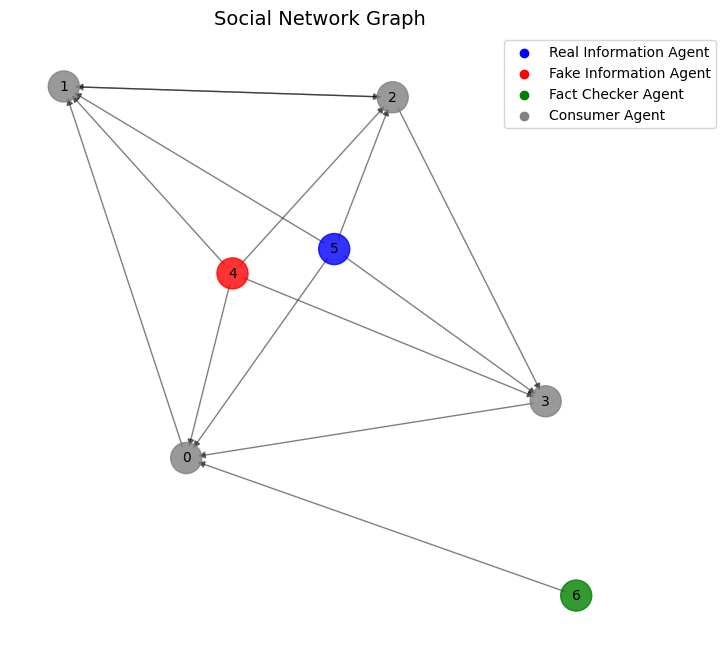

fake info - reward: 5, penalty : 15
real info - reward: 8, penalty : 12
fact checker - reward: 3 penalty: 0
--------- epoch 5 ---------------------
total_consumer_nodes in nw 4
original nw influence of src agent 4 : 1.00
agent 4
num of influenced consumer from agent  4 4
all consumers 4  influenced [1, 3, 2, 0]
total trust_in src agent 1.0


total_consumer_nodes in nw 4
original nw influence of src agent 5 : 1.00
agent 5
num of influenced consumer from agent  5 4
all consumers 5  influenced [0, 1, 3, 2]
total trust_in src agent 1.0


Fact-checker penalized fake news agent 4.
Fact-checker Q-value updated: 1.72
Graph Nodes and Attributes:
Node 0: {'agentType': 'consumer', 'trustLevel': 0, 'storedInfo': [(4, '1.00'), (5, '0.25'), (4, '1.00'), (5, '1.00'), (4, '1.00'), (5, '1.00'), (4, '1.00'), (5, '1.00'), (4, '1.00'), (5, '1.00'), (4, '1.00'), (5, '1.00')], 'reward': 0, 'penalty': 0}
Node 1: {'agentType': 'consumer', 'trustLevel': 0.2, 'storedInfo': [(4, '0.25'), (5, '0.50'), (4, '1.00')

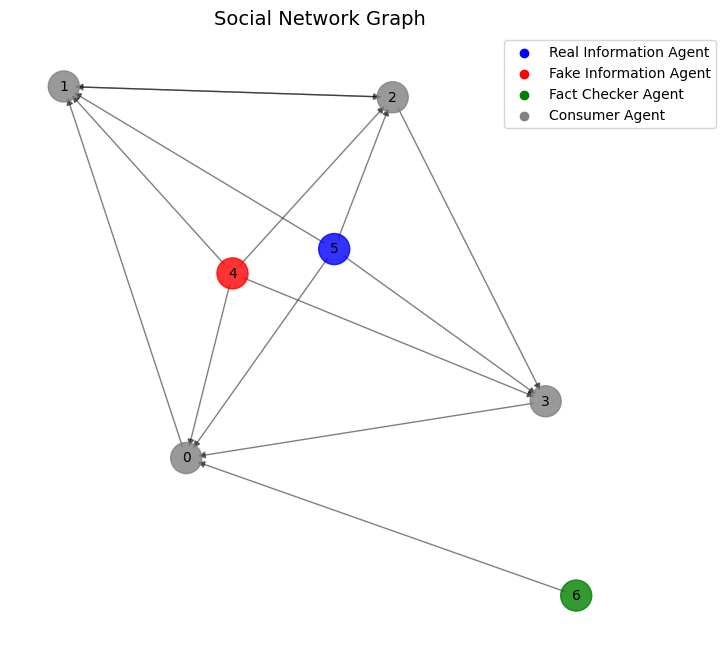

fake info - reward: 6, penalty : 18
real info - reward: 10, penalty : 14
fact checker - reward: 4 penalty: 0
--------- epoch 6 ---------------------
total_consumer_nodes in nw 4
original nw influence of src agent 4 : 1.00
agent 4
num of influenced consumer from agent  4 4
all consumers 4  influenced [1, 3, 2, 0]
total trust_in src agent 1.0


total_consumer_nodes in nw 4
original nw influence of src agent 5 : 1.00
agent 5
num of influenced consumer from agent  5 4
all consumers 5  influenced [0, 1, 3, 2]
total trust_in src agent 1.0


Fact-checker penalized fake news agent 4.
Fact-checker Q-value updated: 2.50
Graph Nodes and Attributes:
Node 0: {'agentType': 'consumer', 'trustLevel': 0, 'storedInfo': [(4, '1.00'), (5, '0.25'), (4, '1.00'), (5, '1.00'), (4, '1.00'), (5, '1.00'), (4, '1.00'), (5, '1.00'), (4, '1.00'), (5, '1.00'), (4, '1.00'), (5, '1.00'), (4, '1.00'), (5, '1.00')], 'reward': 0, 'penalty': 0}
Node 1: {'agentType': 'consumer', 'trustLevel': 0.20000000000000004, 'storedIn

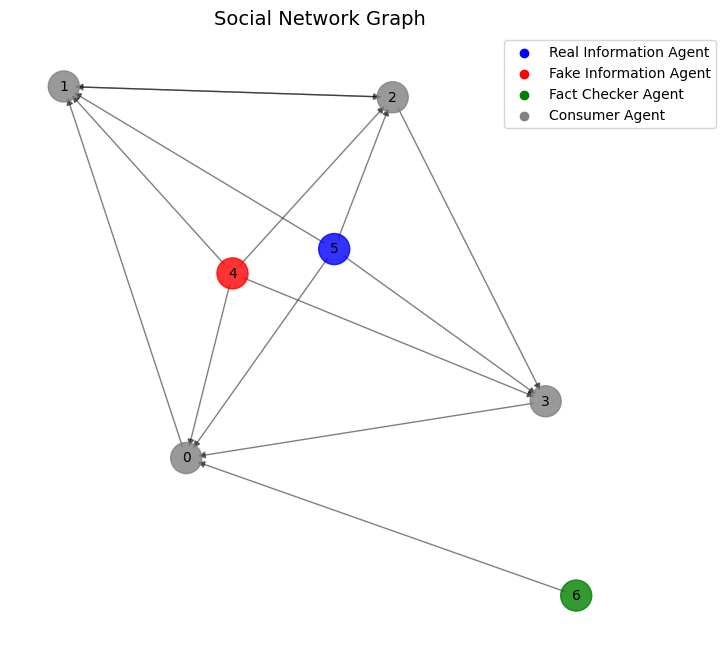

fake info - reward: 8, penalty : 20
real info - reward: 10, penalty : 18
fact checker - reward: 5 penalty: 0


In [3]:


for i in range(network.network_size):
    print(f"--------- epoch {i} ---------------------")

    obs, reward, penalty = network.step(fAgent_action, fAgent)
    obs2, reward2, penalty2 = network.step(rAgent_action, rAgent)


    network.step_fact_checker(fcAgent)

    network.render()
    # network.print_graph()

    # print("\n\n ------------fake info -------------")
    # print("Observation:", obs)
    # print("Reward:", reward)
    # print("Penalty:", penalty)

    # print("\n\n ------------real info -------------")
    # print("Observation:", obs2)
    # print("Reward:", reward2)
    # print("Info:", penalty2)

    print(f"fake info - reward: {reward}, penalty : {penalty}")
    print(f"real info - reward: {reward2}, penalty : {penalty2}")
    print(f"fact checker - reward: {fcAgent.reward} penalty: {fcAgent.penalty}")
